# Task 2 - Wine Quality Prediction

*Varad Deshmukh*
___

**Instructions** : Machine Learning model to predict the quality of wine using linear regression only Jupyter notebook code.

> ## Importing Libraries

In [1]:
# import necessary libraries, modules and model classes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, accuracy_score

> ## Loading the data

We load the housing price data contained in the `WineQT.csv` file into a `pandas DataFrame` object.

In [2]:
# load the data into a DataFrame and have a glimpse of it
wine = pd.read_csv('WineQT.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


> ## Data Preprocessing

Next, we check the data for any missing values, duplicates, etc. and subsequently clean the data.

Here, we have got no missing values and no duplicates. Also none of the columns requires any modifications as such. So our data is cleaned.

In [3]:
# high-level introduction to the data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [23]:
# drop the 'id' column
wine = wine.drop(columns=['Id'], axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
# check for null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [25]:
# check for duplicates
wine.duplicated().sum()

125

> ## Data Visualisation

Next, we proceed to visualise the data. First, we plot a histogram showing the quality distribution which gives us an idea of how the data distribution looks like and what its skewness is. Next, for performing bivariate analysis, we plot the variables against the quality. We plot the barplots of quality vs. the variables, for example, residul sugar to see the relation between them.

/Users/varad/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Wine Quality Distribution')

<Figure size 640x480 with 0 Axes>

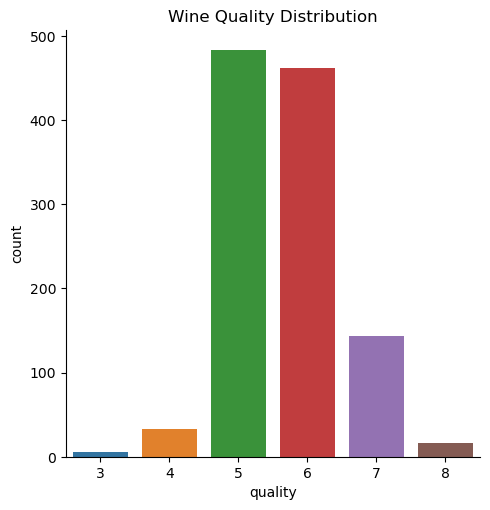

In [26]:
# plot a histogram of wine quality
plt.figure()
sns.catplot(x="quality", data=wine, kind="count")
plt.title('Wine Quality Distribution')

<Axes: xlabel='quality', ylabel='volatile acidity'>

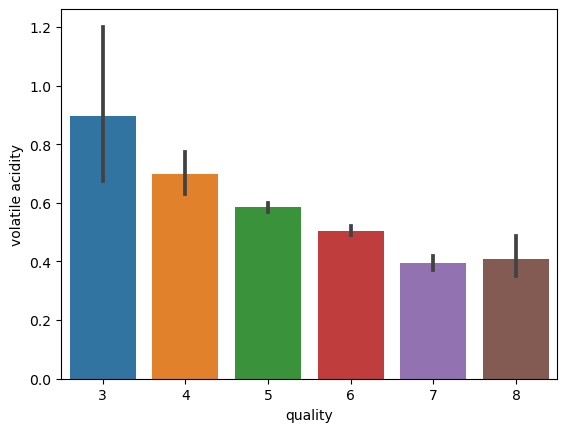

In [27]:
# quality vs. volatile acidity
sns.barplot(x="quality", y="volatile acidity", data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

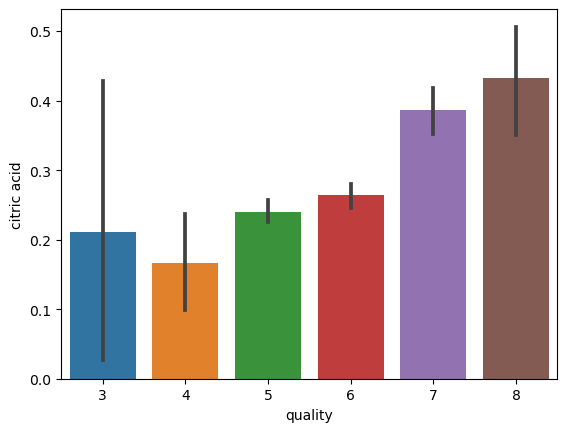

In [28]:
# quality vs. citric acid
sns.barplot(x="quality", y="citric acid", data=wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

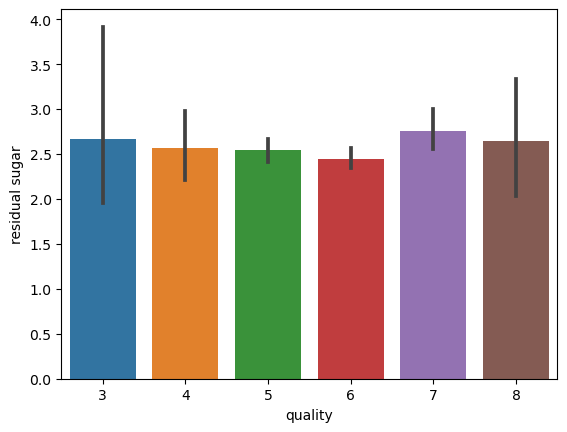

In [29]:
# quality vs. residual sugar
sns.barplot(x="quality", y="residual sugar", data=wine)

We now find any apparent correlation by looking at the correlation matrix and a heatmap for the data.

In [30]:
# correlation matrix
wine.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


<Axes: >

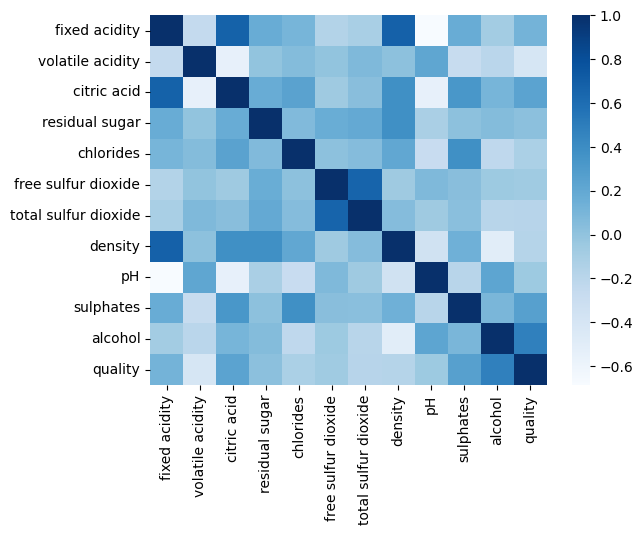

In [44]:
# heatmap, shows correlation visually
sns.heatmap(wine.corr(numeric_only=True), cmap='Blues')

The heatmap shows how the quality is correlated with the variables in the dataset. We see medium correlation with quality of features like fixed acidity, citric acid, sulphates and alcohol.

> ## Modelling the data

We intend to use the Linear Regression supervised learning model. For that we first separate the data into features and target. Then we split the data into training and test data. Then we train our model and employ it to predict the house prices for our test data and compare its accuracy.

In [33]:
# separaton into features and target
X = wine.drop(columns=['quality'], axis=1)
y = wine['quality']

In [34]:
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# look how the training and test data looks like
print('Shapes :')
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

Shapes :
X_train :  (914, 11)
X_test :  (229, 11)
y_train :  (914,)
y_test :  (229,)


In [35]:
# instantiate the linear regression model
model = LinearRegression()

In [36]:
# fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# model predictions on the training data and ascertaining the r2-score
train_predictions = model.predict(X_train)
train_score = r2_score(train_predictions, y_train)

In [38]:
print('The R2 score of the model on training data is : ', train_score)

The R2 score of the model on training data is :  -0.7125176365699855


In [39]:
# model predictions on the test data and ascertaining the r2-score
test_predictions = model.predict(X_test)
test_score = r2_score(test_predictions, y_test)

In [40]:
print('The R2 score of the model on test data is : ', test_score)

The R2 score of the model on test data is :  -0.9295633300999762


We can see that the Linear Regression model is performing very poorly in predicting the wine quality. So, we use the Random Forest model to perform the same task and check how does it perform.

In [41]:
# instantiate the model
model = RandomForestRegressor(n_estimators=100)

In [42]:
# train the model on our training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
# have the model predict the test data and ascertain its accuracy
test_predictions = model.predict(X_test)
score = model.score(X_train, y_train)
print('Model Accuracy : {:.2f}%'.format(score * 100))

Model Accuracy : 92.45%


As we can see, the Random Forest machine learning model is about 92.45% accurate in predicting the wine quality, performing lot better than the Linear Regression model.